In [5]:
import os
from IPython.display import display, Markdown
import pandas as pd

from file_reader import read_cgp_all_cycles

file = os.path.join("..", "..", "Data", "Cluster Growth Profiles 2021-02-04.xlsx")

cgp_historical = read_cgp_all_cycles(file)

In [3]:
def print_markdown_table(headers, data):
    '''
    Renders table given headers and data
    '''
    md = ''

    for h in headers:
        md += '|' + h

    md += '|\n'

    for r in range(len(headers)):
        md += '|---'

    md += '|\n'

    for row in data:
        for element in row:
            md += '|' + str(element)
        md += '|\n'

    display(Markdown(md)) 

In [45]:
seq_1 = [
    "completed_book_1",
    "completed_book_2",
    "completed_book_3_1",
    "completed_book_3_2",
    "completed_book_3_3",
    "completed_book_3_4",
    "completed_book_4",
    "completed_book_5",
    "completed_book_5_br1",
    "completed_book_5_br2",
    "completed_book_5_br3",
    "completed_book_6",
    "completed_book_7"
]

seq_2 = [
    "completed_book_8_1",
    "completed_book_8_2",
    "completed_book_8_3",
    "completed_book_9_1",
    "completed_book_9_2",
    "completed_book_9_3",
    "completed_book_10_1",
    "completed_book_10_2",
    "completed_book_10_3",
    "completed_book_11_1",
    "completed_book_11_2",
    "completed_book_12_1",
    "completed_book_13_1",
    "completed_book_13_2",
    "completed_book_14_1"
]

In [86]:
import matplotlib

array([[<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>]],
      dtype=object)

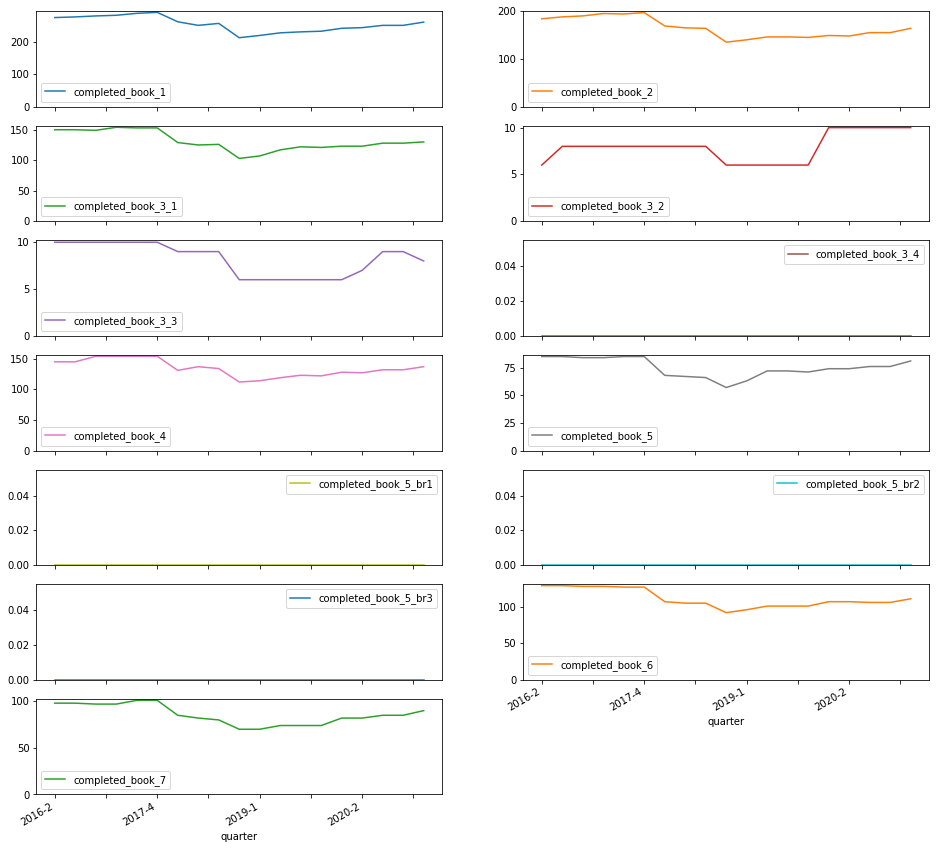

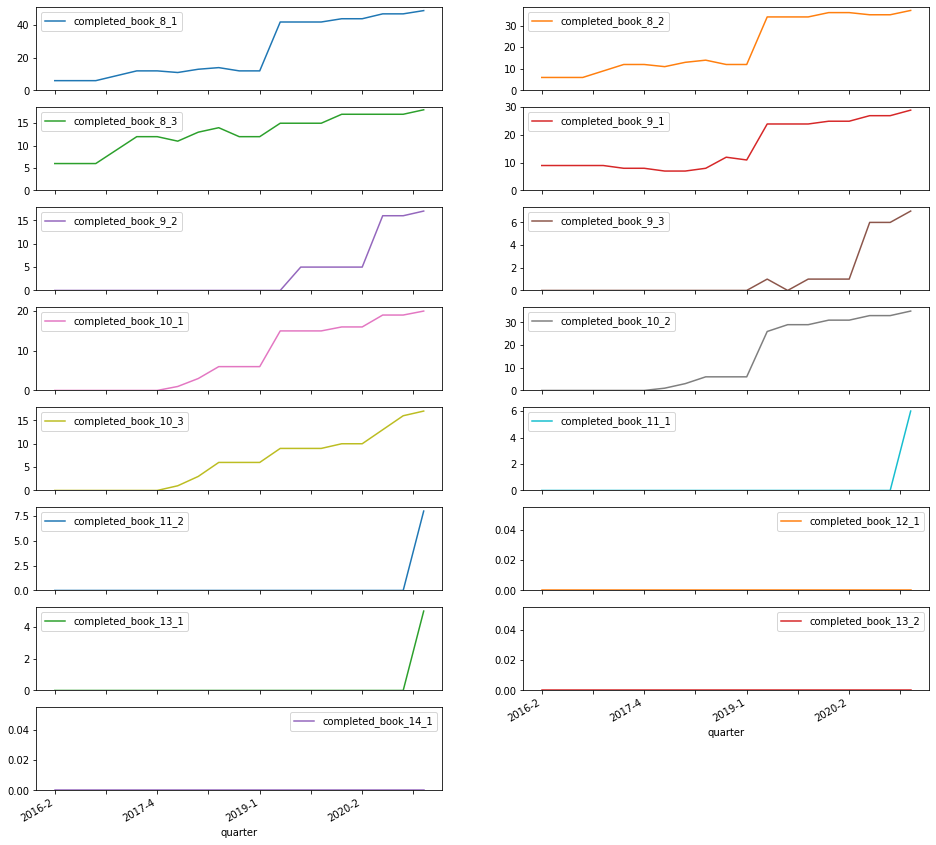

In [208]:
#import constants
group = "Austin"
df = cgp_historical[cgp_historical[constants.GROUPING] == group].copy()

#
df["date"] = pd.to_datetime(df["end_date"])
df.dropna(subset=["date"], inplace=True)
df["quarter_number"] = 0

df.loc[(df["date"].dt.month.isin([1.0,2.0,3.0])), "quarter_number"] = 1
df.loc[(df["date"].dt.month.isin([4.0,5.0,6.0])), "quarter_number"] = 2
df.loc[(df["date"].dt.month.isin([7.0,8.0,9.0])), "quarter_number"] = 3
df.loc[(df["date"].dt.month.isin([10.0,11.0,12.0])), "quarter_number"] = 4
df["quarter"] = df.apply(lambda row: f"{row['date'].year}-{row['quarter_number']}", axis=1)

quarter_data = df[["cluster_name", "quarter", *seq_1, *seq_2]].groupby(by=["cluster_name", "quarter"]).max()
quarter_data.reset_index(inplace=True)

quarter_data = quarter_data.replace(r'^\s*$', 0, regex=True)

d = {}
for c in [*seq_1, *seq_2]:
    d[c] = 'int32'

quarter_data = quarter_data.astype(d)

cluster = "Austin Area"

qd_seq1 = quarter_data.loc[quarter_data["cluster_name"]==cluster][["quarter", *seq_1]]
qd_seq1.plot(x="quarter", kind="line", subplots=True, ylim=(0), figsize=(16, 16), layout=(7,2))

qd_seq2 = quarter_data.loc[quarter_data["cluster_name"]==cluster][["quarter", *seq_2]]
qd_seq2.fillna(0, inplace=True, axis=1)

qd_seq2.plot(x="quarter", kind="line", subplots=True, ylim=(0), figsize=(16, 16), layout=(8,2))

In [210]:
#qd_seq1.to_clipboard()
#qd_seq2.to_clipboard()
#cluster_activities.to_clipboard()

array([[<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>]],
      dtype=object)

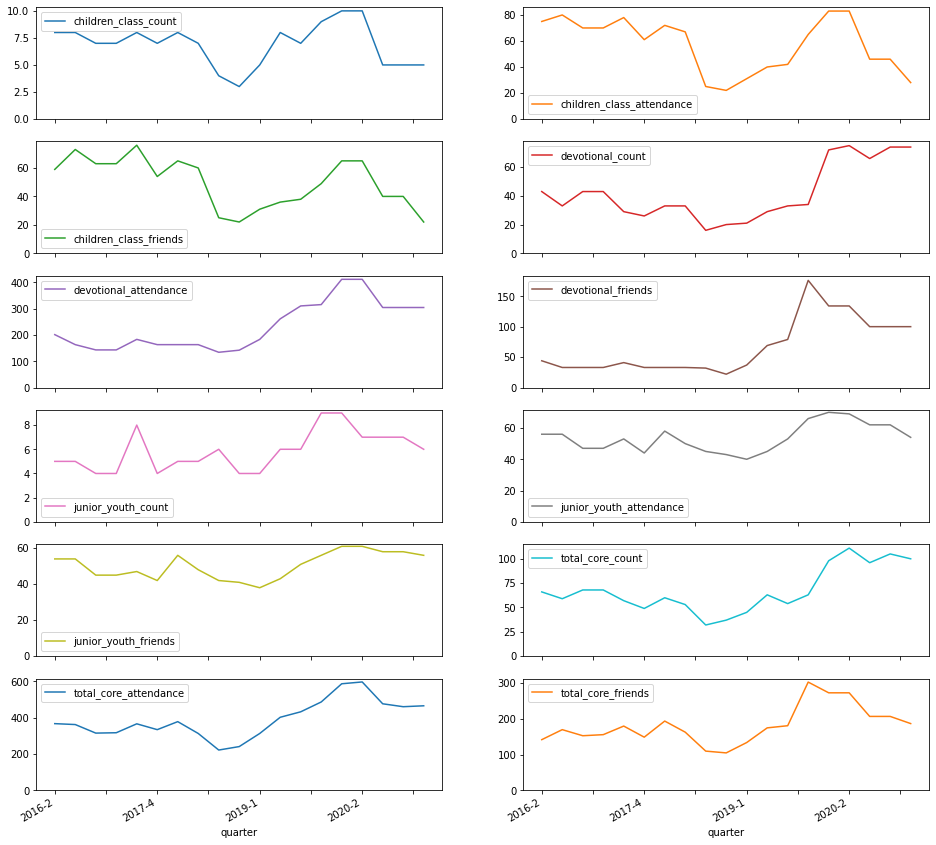

In [206]:
cc_cols = [
    "children_class_count",
    "children_class_attendance",
    "children_class_friends",
]
dev_cols = [
    "devotional_count",
    "devotional_attendance",
    "devotional_friends" 
]
jy_cols = [
    "junior_youth_count",
    "junior_youth_attendance",
    "junior_youth_friends",
]
total_cols = [
    "total_core_count",
    "total_core_attendance",
    "total_core_friends",
]
core_cols = [*cc_cols, *dev_cols, *jy_cols, *total_cols]

quarter_data = df[["cluster_name", "quarter", *core_cols]].groupby(by=["cluster_name", "quarter"]).max()
quarter_data.reset_index(inplace=True)

quarter_data = quarter_data.replace(r'^\s*$', 0, regex=True)

d = {}
for c in [*core_cols]:
    d[c] = 'int32'

quarter_data = quarter_data.astype(d)

cluster = "Austin Area"

cluster_activities = quarter_data.loc[quarter_data["cluster_name"]==cluster][["quarter", *core_cols]]
cluster_activities.plot(x="quarter", kind="line", subplots=True, ylim=(0), figsize=(16, 16), layout=(6,2))

array([[<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>]],
      dtype=object)

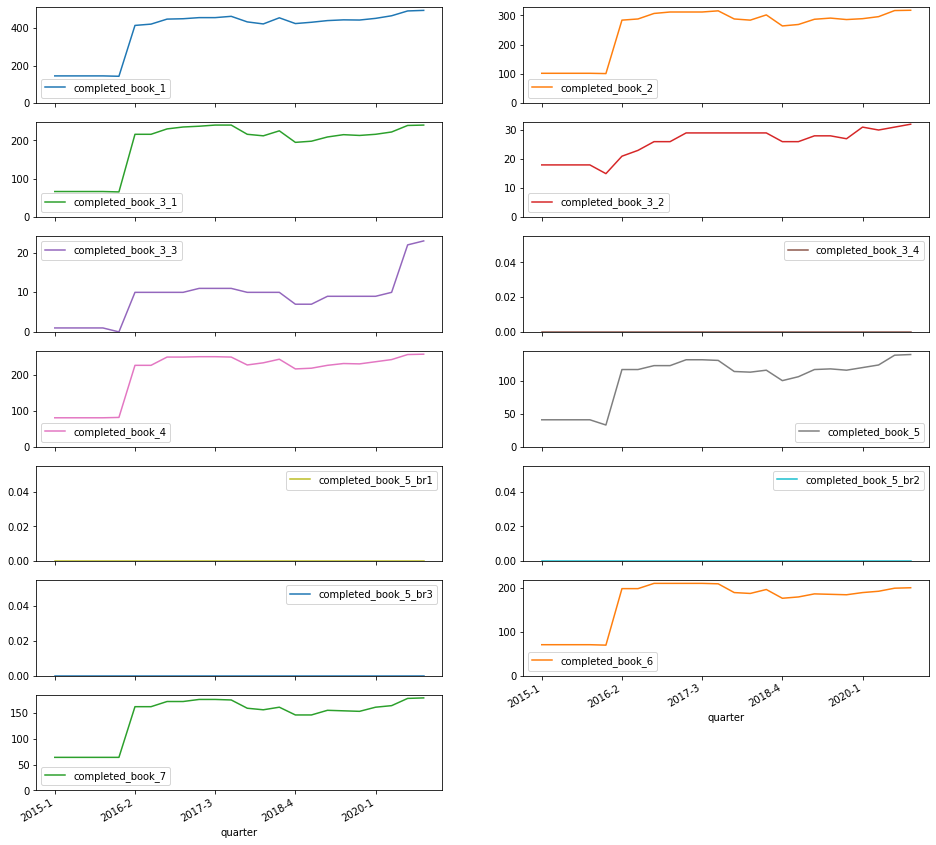

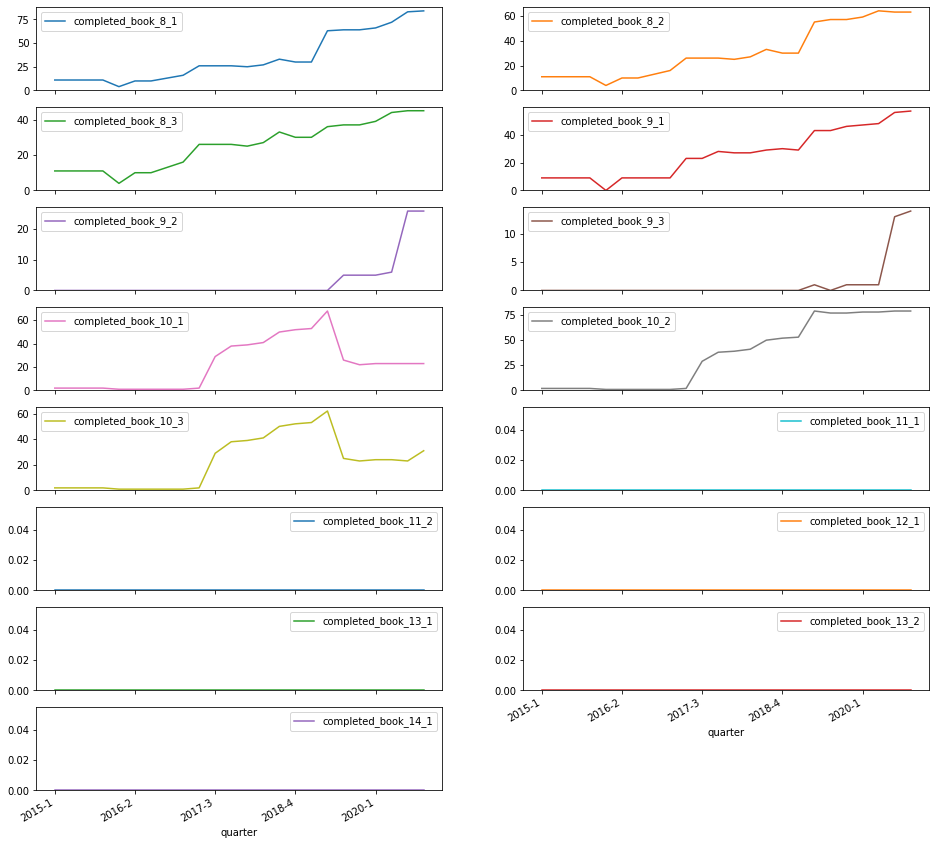

In [191]:
group = "Austin"
df = cgp_historical[cgp_historical[constants.GROUPING] == group].copy()

df["date"] = pd.to_datetime(df["end_date"])
df.dropna(subset=["date"], inplace=True)
df["quarter_number"] = 0

df.loc[(df["date"].dt.month.isin([1.0,2.0,3.0])), "quarter_number"] = 1
df.loc[(df["date"].dt.month.isin([4.0,5.0,6.0])), "quarter_number"] = 2
df.loc[(df["date"].dt.month.isin([7.0,8.0,9.0])), "quarter_number"] = 3
df.loc[(df["date"].dt.month.isin([10.0,11.0,12.0])), "quarter_number"] = 4
df["quarter"] = df.apply(lambda row: f"{row['date'].year}-{row['quarter_number']}", axis=1)

c_qtr = df[["cluster_name", "quarter", *seq_1, *seq_2]].groupby(by=["cluster_name", "quarter"]).max()
c_qtr.reset_index(inplace=True)

c_qtr = c_qtr.replace(r'^\s*$', 0, regex=True)

d = {}
for c in [*seq_1, *seq_2]:
    d[c] = 'int32'

c_qtr = c_qtr.astype(d)

interpolate = c_qtr[(c_qtr["cluster_name"] == "Austin Area") & (c_qtr["quarter"] == "2017-2")].copy()
interpolate["quarter"] = "2017-3"
c_qtr = c_qtr.append(interpolate)
c_qtr.sort_values(by=["quarter"])


g_qtr = c_qtr.groupby(by=["quarter"]).sum()
g_qtr.reset_index(inplace=True)

s1 = g_qtr[g_qtr["quarter"] < "2021-1"][["quarter", *seq_1]]
s1.plot(x="quarter", kind="line", subplots=True, ylim=(0), figsize=(16, 16), layout=(7,2))

s2 = g_qtr[g_qtr["quarter"] < "2021-1"][["quarter", *seq_2]]
s2.plot(x="quarter", kind="line", subplots=True, ylim=(0), figsize=(16, 16), layout=(8,2))

array([[<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>],
       [<AxesSubplot:xlabel='quarter'>, <AxesSubplot:xlabel='quarter'>]],
      dtype=object)

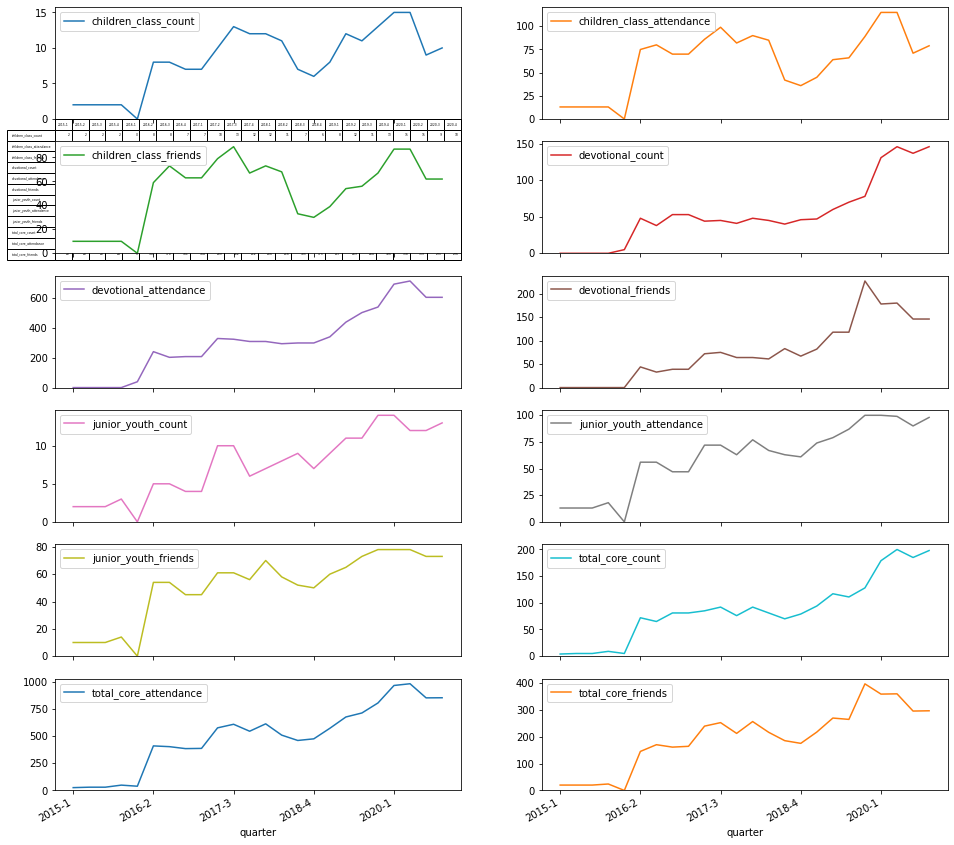

In [189]:
c_qtr = df[["cluster_name", "quarter", *core_cols]].groupby(by=["cluster_name", "quarter"]).max()
c_qtr.reset_index(inplace=True)

c_qtr = c_qtr.replace(r'^\s*$', 0, regex=True)

d = {}
for c in [*core_cols]:
    d[c] = 'int32'

c_qtr = c_qtr.astype(d)

interpolate = c_qtr[(c_qtr["cluster_name"] == "Austin Area") & (c_qtr["quarter"] == "2017-2")].copy()
interpolate["quarter"] = "2017-3"
c_qtr = c_qtr.append(interpolate)
c_qtr.sort_values(by=["quarter"])

g_qtr = c_qtr.groupby(by=["quarter"]).sum()
g_qtr.reset_index(inplace=True)

s1 = g_qtr[g_qtr["quarter"] < "2021-1"][["quarter", *core_cols]]
s1.plot(x="quarter", kind="line", subplots=True, ylim=(0), figsize=(16, 16), layout=(6,2))
